In [3]:
#_PY4CYTOSCAPE = 'git+https://github.com/cytoscape/py4cytoscape@1.7.0' # optional
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

Loading Javascript client ... fa06ffaa-7f59-4615-83ca-9c31e1231567 on https://jupyter-bridge.cytoscape.org


<IPython.core.display.Javascript object>

In [44]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt

In [4]:
import py4cytoscape as p4c
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.3',
 'automationAPIVersion': '1.11.0',
 'py4cytoscapeVersion': '1.11.0',
 'jupyterBridgeVersion': '0.0.2'}

In [11]:
data = np.load('hete_net_14.npz',allow_pickle=True)
data.files

['elements', 'key_gene', 'key_peak']

In [12]:
data['elements']

array([[104,  50,  81,  50,  79,  45,  28,  50,  57, 107],
       [100,  47, 100,  38, 100, 100, 100, 126, 100, 100]])

In [33]:
data['key_gene']

array([{38: ['KLRB1', 'GZMK', 'LINC00299', 'A2M', 'CDKN1B', 'RORA-AS1', 'AC079793.1', 'GIMAP4', 'XAF1', 'AC013652.1', 'VAMP2', 'NLRC3', 'PIK3CD', 'KLRG1', 'MTAP', 'MTRNR2L12', 'DUSP16', 'ITGA6', 'ARL4C', 'RELL1', 'CD28', 'AP001011.1', 'LAT', 'TMEM117', 'ERAP2', 'FCMR', 'NR1D2', 'GPSM3', 'MT-ATP6', 'CD5', 'PSMB9', 'HELB', 'RCAN3', 'RASGRF2', 'CD81', 'LINC00513', 'GOLGA8A', 'HIVEP1', 'NT5DC1', 'RGS1', 'GZMA', 'NR2C2', 'ERP29', 'MT-ND3', 'CD3D', 'EPSTI1', 'PPP1R2', 'FARS2', 'PTPRM', 'MT-ND1', 'TPR', 'COMMD6', 'SFI1', 'SELENOF', 'ZFYVE28', 'FAAH2', 'LINC-PINT', 'MT-ND4', 'GALM', 'GPR174', 'S100A11', 'MAF', 'SET', 'LEF1', 'MTFR1', 'PLCG2', 'CD3E', 'NKG7', 'CHD3', 'SERP1', 'PSMB8', 'CD48', 'ARHGEF6', 'CCL5', 'PCAT1', 'TRAT1', 'EDF1', 'GBP5', 'ATP5IF1', 'TBCA', 'RBM5', 'CDK5RAP2', 'UBL3', 'DAZAP2', 'PRKCQ-AS1', 'TRAC', 'LTB', 'SPAG9', 'CLIC1', 'SCML4', 'GPR183', 'TESPA1', 'CNOT1', 'CDC42SE1', 'PBXIP1', 'MT-CO2', 'MALT1', 'ANKRD36', 'CCND2', 'FLNA'], 47: ['MAF', 'MAST4', 'LINC00299', 'FAAH2', 

In [14]:
data['key_peak']

array([{28: ['chr5-55102204-55103009', 'chr2-86825785-86826701', 'chr2-109143915-109144670', 'chr8-66467545-66468455', 'chr17-75242186-75243068', 'chr5-126508586-126509494', 'chr2-236967748-236968648', 'chr22-28822719-28823582', 'chr5-99037505-99038423', 'chr3-15054778-15055708', 'chr17-41341185-41342069', 'chr10-130301012-130301843', 'chr1-57307135-57308052', 'chr9-92953855-92954737', 'chr6-44932553-44933350', 'chr2-172461730-172462575', 'chr11-122696361-122697108', 'chr18-3305005-3305907', 'chr7-134669562-134670439', 'chr2-100643842-100644708', 'chr11-118342298-118343130', 'chr4-153471455-153472311', 'chr5-758890-759748', 'chr1-19687950-19688899', 'chr9-105405231-105406120', 'chr3-161310665-161311584', 'chr17-58152757-58153665', 'chr21-31354364-31355279', 'chr18-2889538-2890462', 'chr2-162011419-162012322', 'chr2-98835648-98836483', 'chr6-45586350-45587183', 'chr20-35251851-35252761', 'chr6-142845434-142846263', 'chr16-17396593-17397446', 'chr21-45266271-45267160', 'chr4-56821237-568

In [38]:
per_ele_num = 8
peak_ele = [ele+' peak' for ele in data['elements'][0].astype(str)]
gene_ele = [ele+' gene' for ele in data['elements'][1].astype(str)]
gene_list = np.concatenate([data['key_gene'][0][key][:per_ele_num] for key in data['key_gene'][0].keys()])
peak_list = np.concatenate([data['key_peak'][0][key][:per_ele_num] for key in data['key_peak'][0].keys()])
gene_id = np.unique(gene_list)
peak_id = np.unique(peak_list)
gene_source = np.concatenate([[str(key)+' gene']*per_ele_num for key in data['key_gene'][0].keys()])
peak_source = np.concatenate([[str(key)+' peak']*per_ele_num for key in data['key_peak'][0].keys()])

In [42]:
id = list(np.unique(peak_ele))+list(np.unique(gene_ele))+list(gene_id)+list(peak_id)
group = ['peak elements']*np.unique(data['elements'][0]).shape[0]+['gene elements']*np.unique(data['elements'][1]).shape[0]+['gene']*gene_id.shape[0]+['peak']*peak_id.shape[0]
score = [1]*len(id)
source = peak_ele+list(gene_source)+list(peak_source)
target = gene_ele+list(gene_list)+list(peak_list)
weight = [1]*len(target)
nodes = pd.DataFrame(data={'id': id, 'group': group, 'score': score})
edges = pd.DataFrame(data={'source': source, 'target': target, 'weight': weight})
p4c.create_network_from_data_frames(nodes, edges, title="heterogeneous network", collection="DataFrame Example")

Applying default style...
Applying preferred layout


774

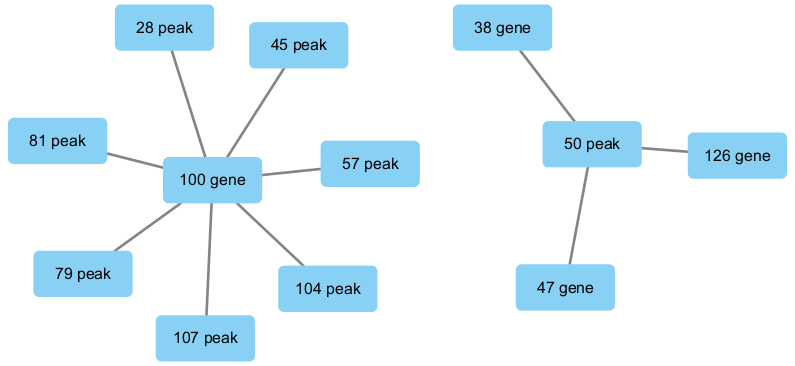

In [26]:
p4c.notebook_export_show_image()

In [ ]:
nodes = pd.DataFrame(data={'id': ["node 0","node 1","node 2","node 3"], 'group': ["A","A","B","B"], 'score': [20,10,15,5]})
edges = pd.DataFrame(data={'source': ["node 0","node 0","node 0","node 2"], 'target': ["node 1","node 2","node 3","node 3"], 'interaction': ["inhibits","interacts","activates","interacts"], 'weight': [5.1,3.0,5.2,9.9]})

p4c.create_network_from_data_frames(nodes, edges, title="my first network", collection="DataFrame Example")

Applying default style...
Applying preferred layout


220

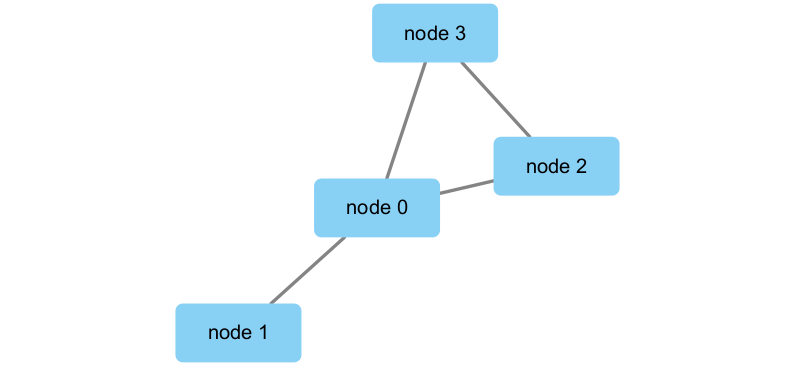

In [6]:
p4c.notebook_export_show_image()

draw GO enrichment

In [119]:
def draw_bar_plot_go(data,title):
    # 创建柱状图
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    fig, ax = plt.subplots(figsize=(10, 6))

    # 存储位置信息和颜色
    indices = []
    colors = []
    labels = []
    enrichments = []
    bar_width = 0.5  # 设置固定的柱子宽度
    current_index_offset = 0  # 当前偏移索引

    # 检查生物过程 (BP)
    if 'bp label' in data and 'bp p-val' in data and data['bp label'] and data['bp p-val']:
        bp_enrichment = -np.log10(data['bp p-val'])
        indices_bp = np.arange(len(data['bp label'])) + current_index_offset
        indices.append(indices_bp)
        colors.append('lightgreen')
        labels.append('Biological Process (BP)')
        enrichments.append(bp_enrichment)
        current_index_offset += len(data['bp label']) + 0.5  # 更新偏移索引以确保间隔

    # 检查细胞成分 (CC)
    if 'cc label' in data and 'cc p-val' in data and data['cc label'] and data['cc p-val']:
        cc_enrichment = -np.log10(data['cc p-val'])
        indices_cc = np.arange(len(data['cc label'])) + current_index_offset
        indices.append(indices_cc)
        colors.append('lightcoral')
        labels.append('Cellular Component (CC)')
        enrichments.append(cc_enrichment)
        current_index_offset += len(data['cc label']) + 0.5  # 更新偏移索引以确保间隔

    # 检查分子功能 (MF)
    if 'mf label' in data and 'mf p-val' in data and data['mf label'] and data['mf p-val']:
        mf_enrichment = -np.log10(data['mf p-val'])
        indices_mf = np.arange(len(data['mf label'])) + current_index_offset
        indices.append(indices_mf)
        colors.append('lightblue')
        labels.append('Molecular Function (MF)')
        enrichments.append(mf_enrichment)

    # 循环绘制每个类别的柱状图
    for ind, enr, color, label in zip(indices, enrichments, colors, labels):
        ax.bar(ind, enr, width=bar_width, label=label, color=color)

    # 设置轴标签和标题
    ax.set_ylabel('Enrichment score (-log10(p-value))')
    ax.set_title(f'GO Enrichment Analysis - Gene Element {title}')

    # 设置 x 轴刻度标签
    xticks = []
    xtick_labels = []
    if 'bp label' in data:
        xticks.extend(indices[0])
        xtick_labels.extend(data['bp label'])

    if 'cc label' in data:
        xticks.extend(indices[1])
        xtick_labels.extend(data['cc label'])

    if 'mf label' in data:
        xticks.extend(indices[-1])
        xtick_labels.extend(data['mf label'])

    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, rotation=45, ha='right')
    ax.set_xlim(-2, 15)  # 将 x 轴范围设置为 -0.75 到 0.75，确保柱子居中

    # 添加图例
    ax.legend()

    # 显示图形
    plt.tight_layout()
    # plt.show()
    plt.savefig(f'/stor/lep/workspace/multi_diffusion/MM-Diffusion/evaluate_script/figures/attention/go_bar/peak_{title}.pdf')

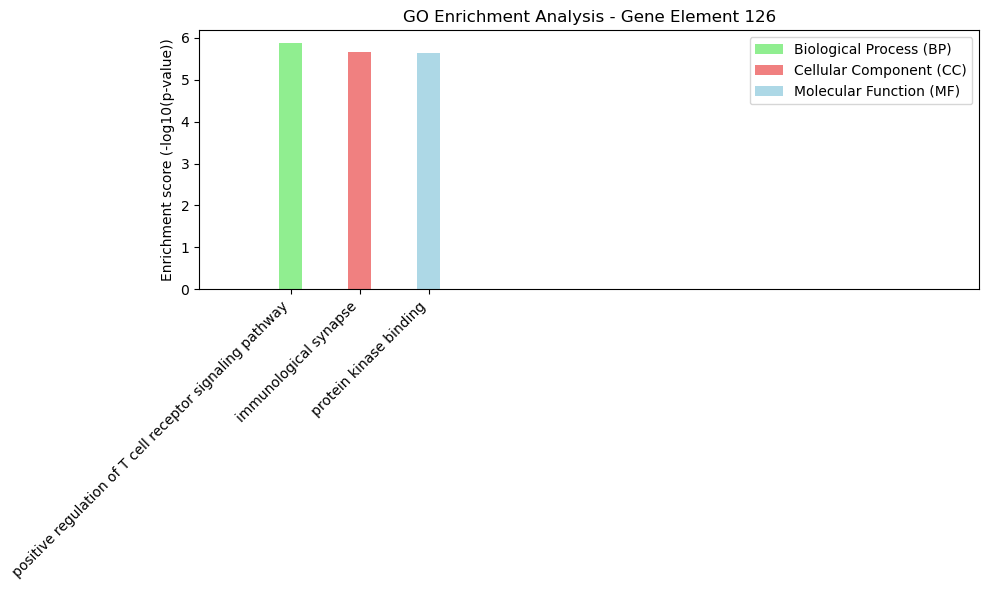

In [117]:
for element in ['126']:#'38','47','100',
    
    all_results = {}
    for compo in ['mf','cc','bp']:
        file_path = f'go_enrich/gene_{element}_{compo}.json'
        if not os.path.isfile(file_path):
            continue

        with open(file_path, 'r') as file:
            data = json.load(file)

        # 提取每个 result 对象的 label 和 pValue
        results = data['overrepresentation']['group']
        if isinstance(results,dict):
            results = [results]

        # 创建一个存储结果的列表
        labels = []
        p_values = []

        for item in results[:5]:
            if isinstance(item['result'],list):
                result = item['result'][0]
            else:
                result = item['result']
            label = result['term']['label']
            p_value = result['input_list']['pValue']
            
            labels.append(label)
            p_values.append(p_value)
        all_results[compo+' label']=labels
        all_results[compo+' p-val']=p_values
    draw_bar_plot_go(all_results,element)

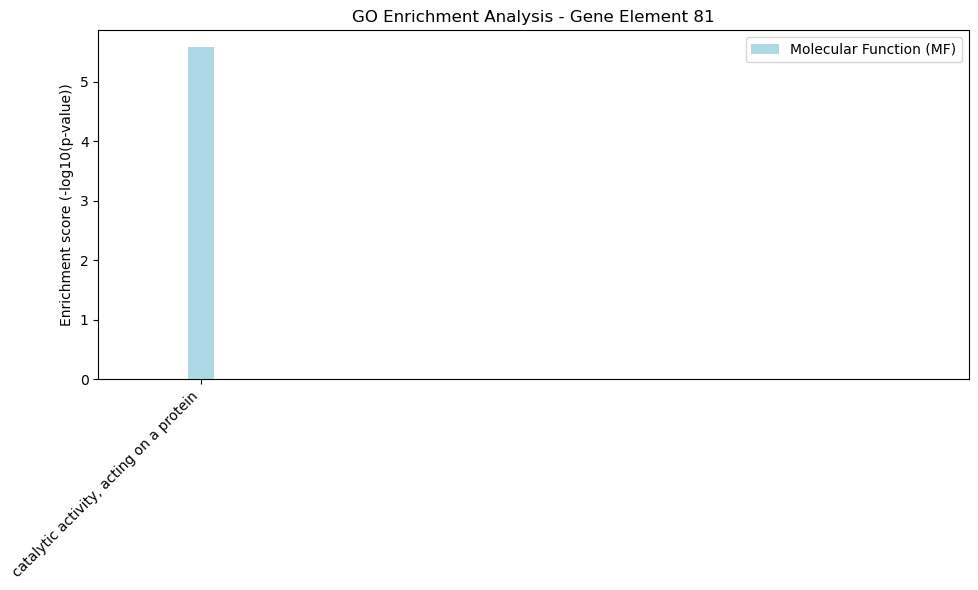

In [ ]:
for element in ['45', '50', '104','81']:# 
    
    all_results = {}
    for compo in ['mf','cc','bp']:
        file_path = f'go_enrich/peak_{element}_{compo}.json'
        if not os.path.isfile(file_path):
            continue

        with open(file_path, 'r') as file:
            data = json.load(file)

        # 提取每个 result 对象的 label 和 pValue
        results = data['overrepresentation']['group']
        if isinstance(results,dict):
            results = [results]

        # 创建一个存储结果的列表
        labels = []
        p_values = []

        for item in results[:5]:
            if isinstance(item['result'],list):
                result = item['result'][0]
            else:
                result = item['result']
            label = result['term']['label']
            p_value = result['input_list']['pValue']
            
            labels.append(label)
            p_values.append(p_value)
        all_results[compo+' label']=labels
        all_results[compo+' p-val']=p_values
    draw_bar_plot_go(all_results,element)